In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np
import matplotlib.pyplot as plt
!pip install opencv-python
import cv2
import math
from PIL import Image

In [15]:
# step 1 - Gaussian Blurring
def gkern(w, l, sig):
    """
    parameters:
    w: width of the filter matrix
    l: length of the filter matrix
    sig: scale
    Return 2D guassian matrix with widthw and length l, scale sig.
    """
    # Return number of l evenly spaced numbers over the ientrval represents w and l in formula
    w = np.linspace(-(w-1), w-1, w)
    l = np.linspace(-(l-1), l-1, l)

    # create saparate filter of w and l
    gauss_w = np.exp(-np.square(w)/ np.square(sig)) * math.sqrt((2*math.pi*np.square(sig)))
    gauss_l = np.exp(-np.square(l)/ np.square(sig)) * math.sqrt((2*math.pi*np.square(sig)))

    # multiply two part together to get gaussian filter 
    gauss = np.outer(gauss_w, gauss_l)
    return gauss / np.sum(gauss)

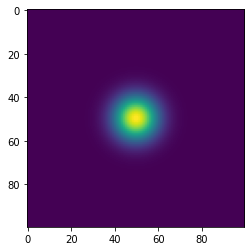

In [16]:
plt.imshow(gkern(100, 100, 20))

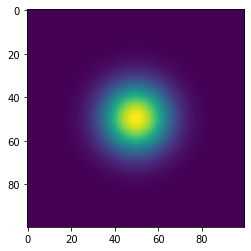

In [17]:
plt.imshow(gkern(100, 100,30))

In [18]:
#Step 2: Gradient Magnitude
def sobel_grad(I):
    """
    parameter:
    I: image
    return the gradient magnitude as output using the Sobel operator
    """
    grey_image = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobelx = convolve_helper(grey_image, kernelx)
    sobely = convolve_helper(grey_image, kernely)
    grad_mag = (abs(sobelx**1) + abs(sobely**1))**0.5
    return grad_mag

def convolve_helper(image, filter):
    """This function is to do a convolution on the image using filter
    parameter:
    image: a numpy array of image
    filter: a numpy array of filter
    return a numpy array of the same size as image
    """
    # Flip the kernel
    filter2 = np.flipud(np.fliplr(filter))
    # initialize an array with all elements equal zero, same size as image
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    # copy the image array to the padded array 
    image_padded[1:-1, 1:-1] = np.array(image)

    # Loop over every pixel of the image
    for i in range(image.shape[1]):
        for j in range(image.shape[0]):
            output[j, i] = (filter2 * image_padded[j: j+3, i: i+3]).sum()
    return output

In [19]:
#Step3: Threshold Algorithm
def threshold(grad_mag,img):

    # get the initial threshold
    threshold = 0
    new_threshold = np.sum(grad_mag)/(img.shape[0]*img.shape[1])

    #set the index 0 and categorize the pixels into two classess
    i = 0
    while threshold != new_threshold:
        l_class = []
        u_class = []
        for x in range(img.shape[1]):
            for y in range(img.shape[0]):
                if grad_mag[y, x] < new_threshold:
                    l_class.append(grad_mag[y, x])
                else:
                    u_class.append(grad_mag[y, x])
        # average gradient magnitudes of lower and upper classes
        mL = sum(l_class)/len(l_class)
        mH = sum(u_class)/len(u_class)
        threshold = new_threshold
        new_threshold = (mL + mH)/2
        i += 1
    edge_img = np.empty((img.shape[0], img.shape[1]))
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            if grad_mag[y, x] >= new_threshold:
                edge_img[y, x] = 255
            else:
                edge_img[y, x] = 0
  
    return edge_img
    

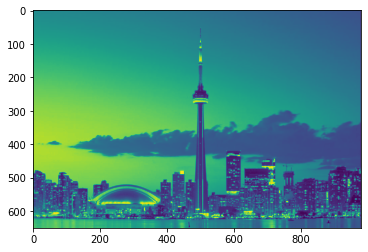

In [20]:
image1 = cv2.imread("/content/drive/My Drive/image1.jpg")
grey_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


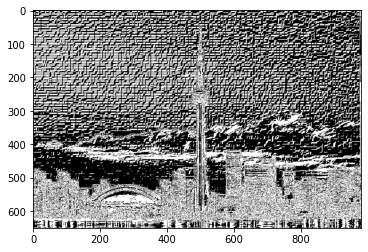

In [21]:
grad_mag1 = sobel_grad(image1)
image_matrix = threshold(grad_mag1, image1)
plt.imshow(cv2.cvtColor(np.float32(image_matrix), cv2.COLOR_BGR2RGB))
plt.show()

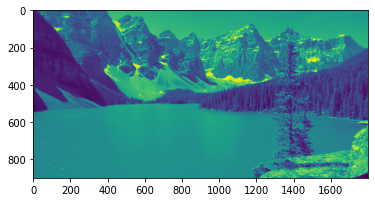

In [22]:
image2 = cv2.imread("/content/drive/My Drive/image2.jpg")
grey_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


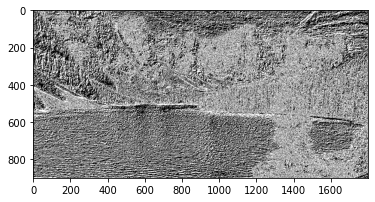

In [23]:
grad_mag2 = sobel_grad(image2)
image_matrix = threshold(grad_mag2, image2)
plt.imshow(cv2.cvtColor(np.float32(image_matrix), cv2.COLOR_BGR2RGB))
plt.show()

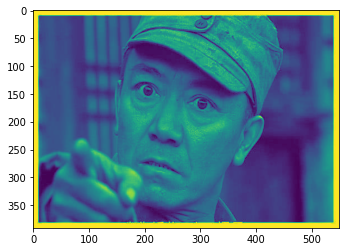

In [24]:
image3 = cv2.imread("/content/drive/My Drive/liyunlong.jpg")
grey_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


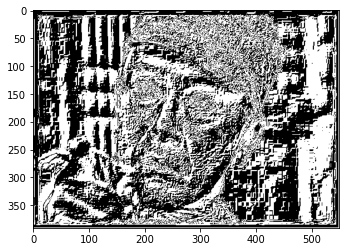

In [25]:
grad_mag3 = sobel_grad(image3)
image_matrix = threshold(grad_mag3, image3)
plt.imshow(cv2.cvtColor(np.float32(image_matrix), cv2.COLOR_BGR2RGB))
plt.show()